In [23]:
import pandas as pd

# Load the dataset
spotify = pd.read_csv('spotify.csv')

spotify


,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),2014-04-28,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,2013-03-08,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432


In [24]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [25]:
import pandas as pd

# Convert 'track_album_release_date' to datetime format with error handling
spotify['track_album_release_date'] = pd.to_datetime(spotify['track_album_release_date'], errors='coerce')

# Extract the year from the 'track_album_release_date'
spotify['year'] = spotify['track_album_release_date'].dt.year

# Filter the data for the year 2017
spotify_2017 = spotify[spotify['year'] == 2017]

# Group by genre and calculate the average values
spotify_avg = spotify_2017.groupby('playlist_genre').agg({
    'loudness': 'mean',
    'mode': 'mean',
    'speechiness': 'mean',
    'acousticness': 'mean',
    'instrumentalness': 'mean',
    'liveness': 'mean',
    'valence': 'mean',
    'tempo': 'mean',
    'duration_ms': lambda x: x.mean() / 60000  # Convert milliseconds to minutes
}).reset_index()

# Rename the duration column to reflect that it's in minutes
spotify_avg.rename(columns={'duration_ms': 'duration_minutes'}, inplace=True)

# Display the resulting DataFrame
spotify_avg





,playlist_genre,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_minutes
0,edm,-5.488184,0.546392,0.080881,0.093323,0.171589,0.188008,0.408136,123.911472,3.762918
1,latin,-6.054218,0.589873,0.096266,0.179929,0.051904,0.178064,0.567343,117.825025,3.528350
2,pop,-6.097230,0.535714,0.076634,0.189251,0.049959,0.170986,0.492012,118.333970,3.587487
3,r&b,-7.674685,0.521552,0.144754,0.305785,0.036085,0.168233,0.441277,115.150198,3.723384
4,rap,-6.700654,0.523810,0.218910,0.204430,0.052506,0.184626,0.424720,123.851310,3.442068
5,rock,-7.042250,0.577586,0.064947,0.174181,0.117893,0.201316,0.425194,129.680991,4.213990


In [26]:
# Save the DataFrame to a CSV file
spotify_avg.to_csv('spotify_genre_summary_2017.csv', index=False)

In [27]:
import pandas as pd

# Calculate the correlation matrix for relevant columns
correlation_matrix = spotify_2017[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 
                              'instrumentalness', 'liveness', 'valence', 'tempo']].corr()

# Display the correlation matrix
correlation_matrix


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
danceability,1.000000,-0.010399,0.116584,0.110413,-0.037089,-0.007956,-0.124700,0.326548,-0.117292
energy,-0.010399,1.000000,0.659693,-0.028423,-0.522086,0.002908,0.147612,0.259415,0.134594
loudness,0.116584,0.659693,1.000000,-0.070235,-0.360073,-0.254785,0.042839,0.241392,0.066852
speechiness,0.110413,-0.028423,-0.070235,1.000000,0.060963,-0.103047,0.081790,0.026041,0.046718
acousticness,-0.037089,-0.522086,-0.360073,0.060963,1.000000,-0.034078,-0.070064,0.001391,-0.116627
instrumentalness,-0.007956,0.002908,-0.254785,-0.103047,-0.034078,1.000000,-0.018791,-0.152963,0.008136
liveness,-0.124700,0.147612,0.042839,0.081790,-0.070064,-0.018791,1.000000,-0.016513,0.011765
valence,0.326548,0.259415,0.241392,0.026041,0.001391,-0.152963,-0.016513,1.000000,-0.054993
tempo,-0.117292,0.134594,0.066852,0.046718,-0.116627,0.008136,0.011765,-0.054993,1.000000


**Summary of Findings**
Genre Analysis (2017): The analysis of genres in 2017 showed average values for loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, and duration in minutes. The results have been saved to the spotify_genre_summary_2017.csv file.


**Key Observations:**

**Danceability vs. Energy:** <br>
**Correlation:** -0.010399<br>
Interpretation: There is a very weak negative correlation between danceability and energy, indicating that these two features are almost independent of each other in this dataset.

**Danceability vs. Loudness:** <br>
Correlation: 0.116584<br>
Interpretation: There is a weak positive correlation between danceability and loudness, suggesting that louder tracks tend to be slightly more danceable.

**Danceability vs. Valence:** <br>
**Correlation:** 0.326548<br>
Interpretation: There is a moderate positive correlation between danceability and valence, meaning that tracks with a higher valence (happier or more positive mood) are generally more danceable.

**Danceability vs. Acousticness:** <br>
**Correlation:** -0.037089<br>
Interpretation: There is a weak negative correlation between danceability and acousticness, indicating that more danceable tracks tend to be slightly less acoustic.

**Danceability vs. Tempo:** <br>
**Correlation:** -0.117292<br>
Interpretation: There is a weak negative correlation between danceability and tempo, suggesting that faster tracks might be slightly less danceable.

**Energy vs. Loudness:** <br>
**Correlation:** 0.659693<br>
Interpretation: There is a strong positive correlation between energy and loudness, meaning that louder tracks are typically more energetic.

**Energy vs. Acousticness:** <br>
**Correlation:** -0.522086<br>
Interpretation: There is a moderate negative correlation between energy and acousticness, suggesting that more energetic tracks are less acoustic.

**Energy vs. Valence:** <br>
**Correlation:** 0.259415<br>
Interpretation: There is a weak positive correlation between energy and valence, indicating that more energetic tracks tend to have a more positive mood.



**Correlation Analysis**

-Danceability is moderately influenced by valence (positivity of the track), with happier tracks being more danceable. There is also a weak relationship with loudness and a slightly negative relationship with tempo.

-Energy is strongly influenced by loudness, indicating that louder tracks tend to be more energetic. Energy also has a moderate negative correlation with acousticness, suggesting that more energetic tracks are less likely to be acoustic.

-Other factors like instrumentalness, liveness, and speechiness show very weak correlations with both danceability and energy, indicating that they don't significantly impact these features in this dataset.

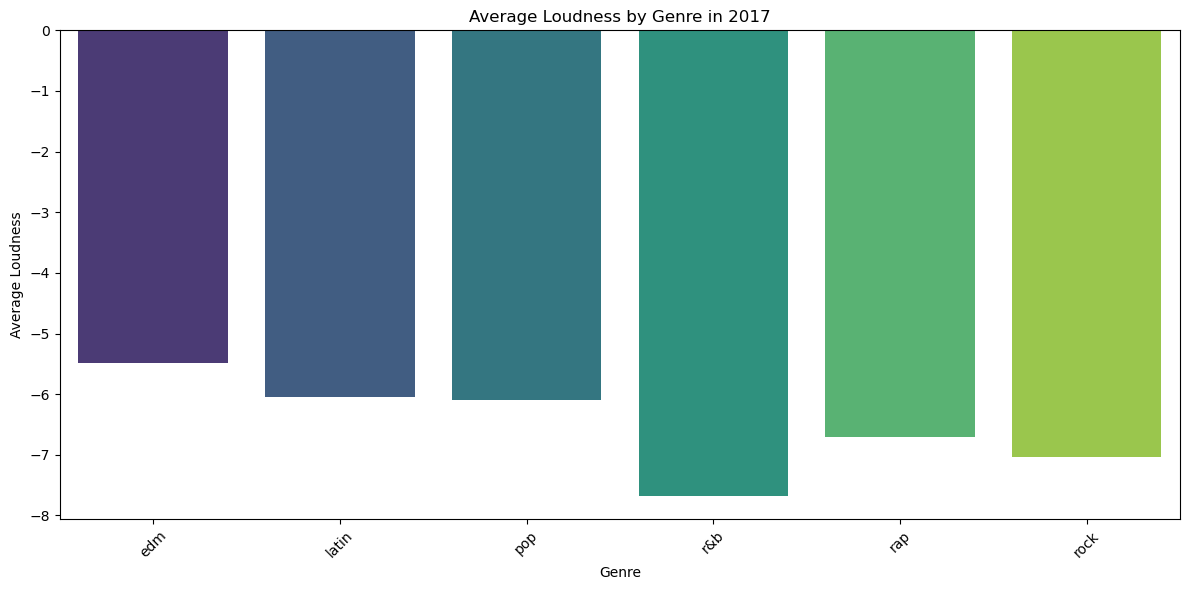

In [20]:
import seaborn as sns

# Create a bar plot for average loudness by genre using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='playlist_genre', y='loudness', data=spotify_avg, palette='viridis')

# Add labels and title
plt.xlabel('Genre')
plt.ylabel('Average Loudness')
plt.title('Average Loudness by Genre in 2017')
plt.xticks(rotation=45)  # Rotate genre names for better readability

# Display the plot
plt.tight_layout()
plt.show()


C:\Users\Tyanj\AppData\Local\Temp\ipykernel_20364\2456854686.py:5: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  g = sns.catplot(
D:\Tyanj\Documents\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Tyanj\Documents\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


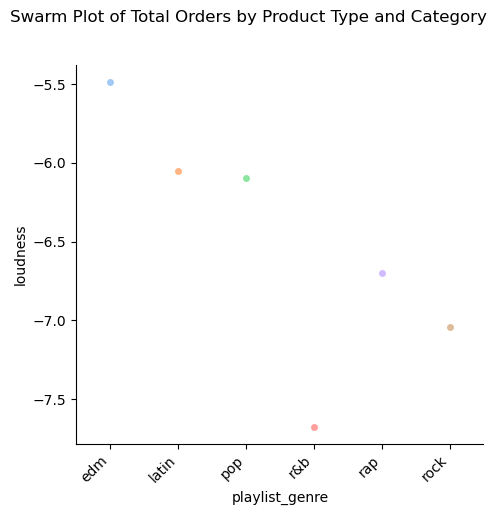

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the catplot
g = sns.catplot(
    x="playlist_genre", 
    y="loudness", 
    kind="swarm", 
    palette="pastel",  
    data=df_avg
)

# Customize the plot
g.fig.suptitle('Swarm Plot of Total Orders by Product Type and Category', y=1.02)  # Adjust title position
g.set_xticklabels(rotation=45, ha='right')  # Rotate x-axis labels


# Adjust the layout to make room for the legend
plt.subplots_adjust(right=0.85)  # Increase space on the right side for legend

# Show plot
plt.tight_layout()
plt.show()